In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import ast


In [ ]:

# Load the CSV file
def load_and_preprocess_data(csv_file_path):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    # Convert the embedding string to numpy array
    def parse_embedding(embedding_str):
        try:
            # Remove quotes and convert to list
            if isinstance(embedding_str, str):
                # If it's a string representation of list
                return np.array(ast.literal_eval(embedding_str))
            else:
                return np.array(embedding_str)
        except:
            print(f"Error parsing embedding: {embedding_str}")
            return np.zeros(40)  # Return zeros if parsing fails

    # Apply parsing to embedding column
    df['embedding_array'] = df['embedding'].apply(parse_embedding)

    # Create features matrix
    X = np.stack(df['embedding_array'].values)

    # Create labels
    y = df['label'].values

    print(f"Data shape: {X.shape}")
    print(f"Labels shape: {y.shape}")
    print(f"Unique labels: {np.unique(y)}")
    print(f"Label distribution:\n{pd.Series(y).value_counts().sort_index()}")

    return X, y


In [ ]:
df.head()

,filename,label,embedding
0,dia0_utt0.wav,4,"[-198.26729, 66.986755, 2.2443757, 24.060778, ..."
1,dia0_utt1.wav,4,"[-223.40138, 76.86235, 15.356375, 21.609234, -..."
2,dia0_utt2.wav,4,"[-276.21115, 78.33036, -9.06708, 21.393948, -8..."
3,dia0_utt3.wav,4,"[-244.47275, 57.03381, 9.143935, 20.572392, -9..."
4,dia0_utt4.wav,6,"[-185.05246, 87.886795, -47.40703, 6.0729036, ..."


In [ ]:
df["embedding"][567]


array([-2.1675111e+02,  7.5557083e+01, -1.1280628e+01,  1.4403831e+01,
       -8.8259449e+00,  4.5340881e+00, -1.0931552e+01,  2.9486990e+00,
       -3.5852091e+00,  1.0202447e+01,  2.3019359e+00,  1.9150630e+00,
       -2.3542571e+00,  1.8926964e+00, -5.4063606e+00,  5.8552289e-01,
       -1.3471677e+00,  1.6926659e+00, -7.0758791e+00, -6.2071633e-01,
       -5.8977108e+00,  1.3837999e+00, -3.9798276e+00,  2.0468406e-01,
       -5.8486118e+00, -1.2407542e+00, -3.2918034e+00,  1.6080652e+00,
       -3.1043127e-01,  3.9627609e+00, -2.6692662e+00,  1.4741149e+00,
       -2.4137735e+00,  1.4152915e+00, -2.7852948e+00,  1.2266476e+00,
       -4.0185585e+00, -1.5199655e+00, -4.0967760e+00,  1.5003437e-01],
      dtype=float32)

In [ ]:
# Build the neural network model
def create_model(input_dim, num_classes):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
        metrics=['accuracy']
    )

    return model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import re

# Simple robust version
df = pd.read_csv('train_audio_with_mfcc.csv')

# Simple embedding conversion using regex
def simple_convert(embedding_str):
    if isinstance(embedding_str, str):
        # Extract all numbers (including negative) using regex
        numbers = re.findall(r'-?\d+\.?\d*', embedding_str)
        return [float(x) for x in numbers]
    elif isinstance(embedding_str, list):
        return embedding_str
    else:
        return []

# Convert embeddings
X_arrays = df['embedding'].apply(simple_convert)
y = df['label']

# Find the most common length
lengths = X_arrays.apply(len)
target_length = lengths.mode()[0]

# Filter to keep only embeddings with target length
mask = lengths == target_length
X_arrays = X_arrays[mask]
y = y[mask]

# Convert to numpy
X = np.array(X_arrays.tolist())
y = y.values

print(f"Final data shape: {X.shape}")
print(f"Labels: {np.unique(y)}")

# Continue with the same training code as above...
# Split, scale, build model, train, evaluate

Final data shape: (9982, 40)
Labels: [0 1 2 3 4 5 6]


array([4, 4, 4, ..., 6, 4, 3])

Final data shape: (9982, 40)
Labels: [0 1 2 3 4 5 6]
Label distribution:
0    1109
1     271
2     268
3    1740
4    4706
5     683
6    1205
Name: count, dtype: int64

Training set: (8983, 40)
Test set: (999, 40)

Features scaled successfully!

Building neural network:
- Input dimension: 40
- Number of classes: 7


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,815 (61.78 KB)

 Trainable params: 15,815 (61.78 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4227 - loss: 1.6472 - val_accuracy: 0.4672 - val_loss: 1.5273 - learning_rate: 0.0010
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4706 - loss: 1.5310 - val_accuracy: 0.4672 - val_loss: 1.5215 - learning_rate: 0.0010
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4840 - loss: 1.4865 - val_accuracy: 0.4683 - val_loss: 1.5169 - learning_rate: 0.0010
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4776 - loss: 1.5070 - val_accuracy: 0.4694 - val_loss: 1.5058 - learning_rate: 0.0010
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4795 - loss: 1.4814 - val_accuracy: 0.4638 - val_loss: 1.5027 - learning_rate: 0.0010
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4716 - loss: 1.4781 - val_accuracy: 0.4661 - val_loss: 1.5062 - learning_rate: 0.0010
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accu

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


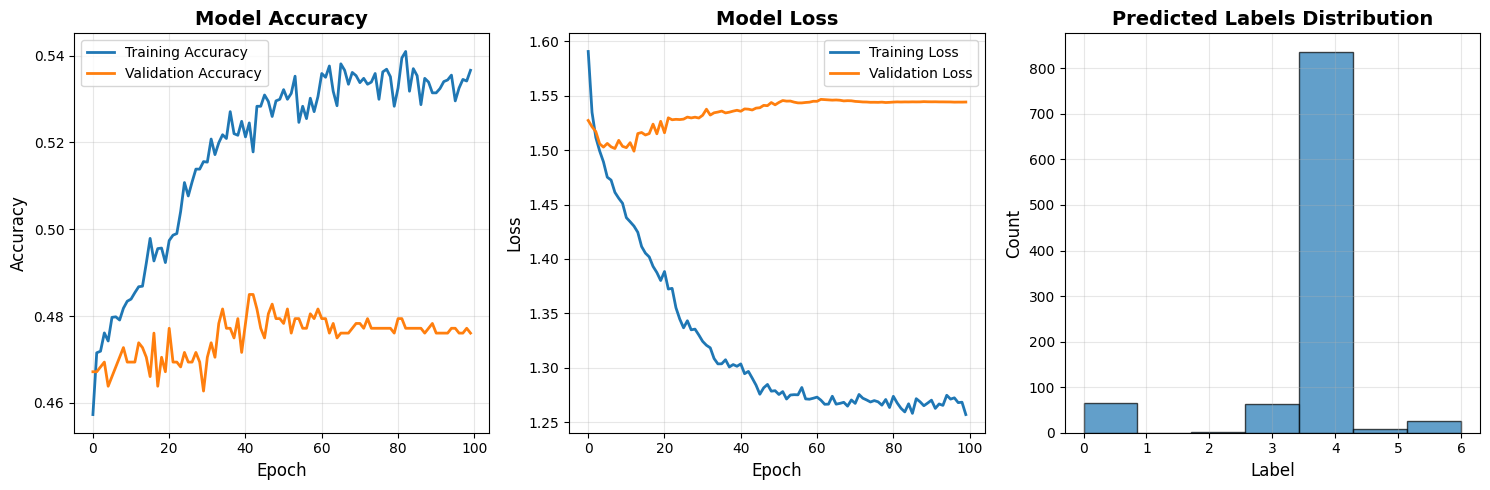


Model saved as 'audio_classification_model.h5'
Scaler saved as 'scaler.pkl'

PREDICTION EXAMPLES

Sample 1:
  True label: 4
  Predicted label: 4
  Confidence: 0.6719
  Correct: True
  All probabilities: {'Class 0': '0.0464', 'Class 1': '0.0046', 'Class 2': '0.0086', 'Class 3': '0.1502', 'Class 4': '0.6719', 'Class 5': '0.0548', 'Class 6': '0.0634'}

Sample 2:
  True label: 1
  Predicted label: 0
  Confidence: 0.3245
  Correct: False
  All probabilities: {'Class 0': '0.3245', 'Class 1': '0.0404', 'Class 2': '0.0063', 'Class 3': '0.0984', 'Class 4': '0.3240', 'Class 5': '0.0987', 'Class 6': '0.1076'}

Sample 3:
  True label: 4
  Predicted label: 4
  Confidence: 0.4298
  Correct: True
  All probabilities: {'Class 0': '0.0448', 'Class 1': '0.0165', 'Class 2': '0.0184', 'Class 3': '0.1052', 'Class 4': '0.4298', 'Class 5': '0.2892', 'Class 6': '0.0961'}

FINAL RESULTS
Test Accuracy: 44.94%
Best Validation Accuracy: 0.4850
Best Training Accuracy: 0.5409
Total training epochs: 100

Model Arch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re

# Simple robust version
df = pd.read_csv('train_audio_with_mfcc.csv')

# Simple embedding conversion using regex
def simple_convert(embedding_str):
    if isinstance(embedding_str, str):
        # Extract all numbers (including negative) using regex
        numbers = re.findall(r'-?\d+\.?\d*', embedding_str)
        return [float(x) for x in numbers]
    elif isinstance(embedding_str, list):
        return embedding_str
    else:
        return []

# Convert embeddings
X_arrays = df['embedding'].apply(simple_convert)
y = df['label']

# Find the most common length
lengths = X_arrays.apply(len)
target_length = lengths.mode()[0]

# Filter to keep only embeddings with target length
mask = lengths == target_length
X_arrays = X_arrays[mask]
y = y[mask]

# Convert to numpy
X = np.array(X_arrays.tolist())
y = y.values

print(f"Final data shape: {X.shape}")
print(f"Labels: {np.unique(y)}")
print(f"Label distribution:\n{pd.Series(y).value_counts().sort_index()}")

# Split data into train and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures scaled successfully!")

# Build the neural network model
num_classes = len(np.unique(y))
input_dim = X.shape[1]

print(f"\nBuilding neural network:")
print(f"- Input dimension: {input_dim}")
print(f"- Number of classes: {num_classes}")

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For integer labels
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Train the model
print("\nTraining the model...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,  # Use 10% of training data for validation
    verbose=1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=10,
            factor=0.5,
            min_lr=1e-7
        )
    ]
)


# Evaluate the model on test set
print("\nEvaluating the model on test set...")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

# Detailed classification report
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Learning rate plot (if available)
plt.subplot(1, 3, 3)
if 'lr' in history.history:
    plt.plot(history.history['lr'], linewidth=2, color='purple')
    plt.title('Learning Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Learning Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
else:
    # Show prediction distribution instead
    plt.hist(y_pred, bins=num_classes, alpha=0.7, edgecolor='black')
    plt.title('Predicted Labels Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model and scaler
model.save('audio_classification_model.h5')
print("\nModel saved as 'audio_classification_model.h5'")

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

# Function to make predictions on new embeddings
def predict_new_sample(model, scaler, embedding_array):
    """
    Predict label for a new embedding sample
    """
    # Ensure proper shape
    if len(embedding_array.shape) == 1:
        embedding_array = embedding_array.reshape(1, -1)

    # Scale the embedding
    embedding_scaled = scaler.transform(embedding_array)

    # Make prediction
    prediction_proba = model.predict(embedding_scaled, verbose=0)
    predicted_label = np.argmax(prediction_proba, axis=1)[0]
    confidence = np.max(prediction_proba)

    # Get probabilities for all classes
    class_probabilities = {
        f'Class {i}': f'{prob:.4f}'
        for i, prob in enumerate(prediction_proba[0])
    }

    return predicted_label, confidence, class_probabilities

# Test the prediction function with a few samples
print("\n" + "="*50)
print("PREDICTION EXAMPLES")
print("="*50)

for i in range(min(3, len(X_test))):
    sample_embedding = X_test[i]
    true_label = y_test[i]

    pred_label, confidence, probabilities = predict_new_sample(model, scaler, sample_embedding)

    print(f"\nSample {i+1}:")
    print(f"  True label: {true_label}")
    print(f"  Predicted label: {pred_label}")
    print(f"  Confidence: {confidence:.4f}")
    print(f"  Correct: {true_label == pred_label}")
    print(f"  All probabilities: {probabilities}")

# Calculate and display overall test accuracy
test_accuracy_percent = test_accuracy * 100
print(f"\n" + "="*50)
print(f"FINAL RESULTS")
print("="*50)
print(f"Test Accuracy: {test_accuracy_percent:.2f}%")
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Best Training Accuracy: {max(history.history['accuracy']):.4f}")
print(f"Total training epochs: {len(history.history['loss'])}")

# Show model architecture details
print(f"\nModel Architecture:")
print(f"- Input shape: ({input_dim},)")
print(f"- Hidden layers: 3")
print(f"- Output units: {num_classes}")
print(f"- Activation: Softmax")
print(f"- Total parameters: {model.count_params():,}")

✅ Final data shape: (11721, 40)
✅ Labels: [0 1 2 3 4 5 6]
✅ Label distribution:
0    1331
1     321
2     304
3    2002
4    5541
5     829
6    1393
Name: count, dtype: int64

Training set: (10548, 40)
Test set: (1173, 40)

✅ Features scaled successfully!

Input shape for CNN-LSTM: (40, 1)
Number of classes: 7


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 40, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 20, 512)        │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 10, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,995,719 (11.43 MB)

 Trainable params: 2,992,391 (11.42 MB)

 Non-trainable params: 3,328 (13.00 KB)

Epoch 1/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 153s 452ms/step - accuracy: 0.2387 - loss: 2.4409 - val_accuracy: 0.4559 - val_loss: 1.7036 - learning_rate: 0.0010
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 133s 447ms/step - accuracy: 0.3962 - loss: 1.7506 - val_accuracy: 0.4550 - val_loss: 1.5745 - learning_rate: 0.0010
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 445ms/step - accuracy: 0.4337 - loss: 1.6288 - val_accuracy: 0.4654 - val_loss: 1.5686 - learning_rate: 0.0010
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 134s 450ms/step - accuracy: 0.4553 - loss: 1.6079 - val_accuracy: 0.4682 - val_loss: 1.5736 - learning_rate: 0.0010
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 143s 454ms/step - accuracy: 0.4679 - loss: 1.5644 - val_accuracy: 0.4673 - val_loss: 1.5424 - learning_rate: 0.0010
Epoch 6/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 133s 447ms/step - accuracy: 0.4652 - loss: 1.5537 - val_accuracy: 0.4654 - val_loss: 1.5608 - learning_rate: 0.0010
Epoch 7/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 134s 451ms/step - accura

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


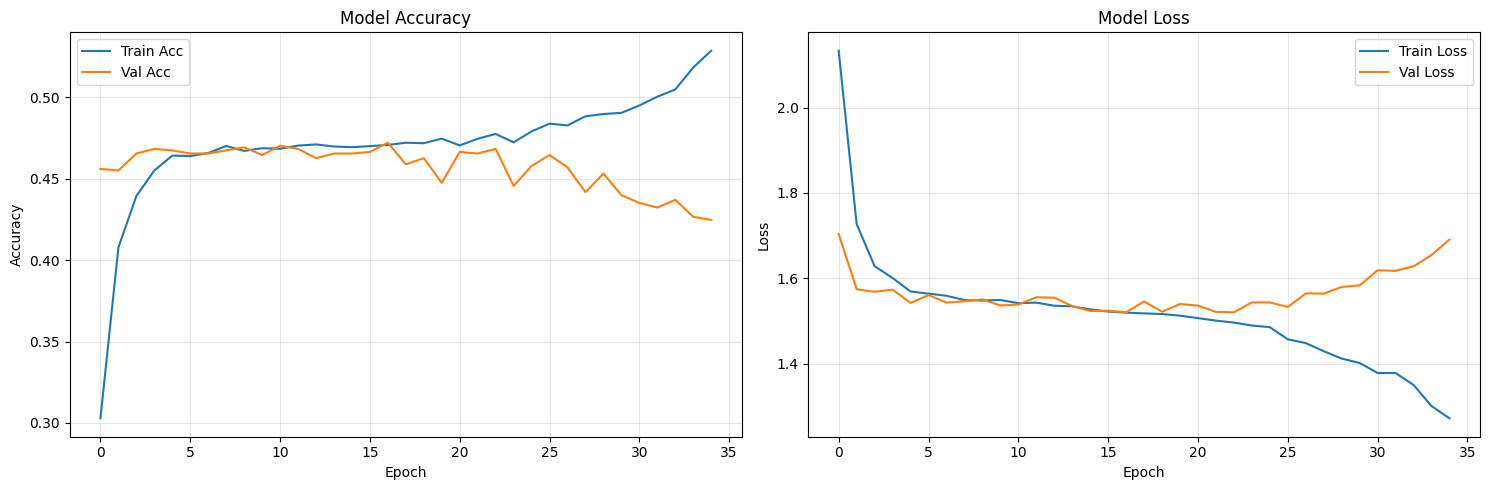


✅ Model and scaler saved successfully!

PREDICTION EXAMPLES
Sample 1: True=4, Pred=4, Conf=0.4237
Sample 2: True=5, Pred=4, Conf=0.2937
Sample 3: True=5, Pred=4, Conf=0.5156

✅ Done!


In [ ]:
✅ Using device: cuda
/tmp/ipython-input-3175891290.py:30: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df["embedding"] = df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=' '))
Epoch [1/25] | Train Loss: 1.8066, Acc: 0.4709 | Val Loss: 1.6073, Acc: 0.4715
Epoch [2/25] | Train Loss: 1.6081, Acc: 0.4715 | Val Loss: 1.5800, Acc: 0.4715
Epoch [3/25] | Train Loss: 1.5733, Acc: 0.4715 | Val Loss: 1.5533, Acc: 0.4715
Epoch [4/25] | Train Loss: 1.5569, Acc: 0.4715 | Val Loss: 1.5444, Acc: 0.4715
Epoch [5/25] | Train Loss: 1.5503, Acc: 0.4715 | Val Loss: 1.5428, Acc: 0.4715
Epoch [6/25] | Train Loss: 1.5472, Acc: 0.4715 | Val Loss: 1.5418, Acc: 0.4715
Epoch [7/25] | Train Loss: 1.5448, Acc: 0.4715 | Val Loss: 1.5400, Acc: 0.4715
Epoch [8/25] | Train Loss: 1.5467, Acc: 0.4715 | Val Loss: 1.5390, Acc: 0.4715
Epoch [9/25] | Train Loss: 1.5449, Acc: 0.4715 | Val Loss: 1.5383, Acc: 0.4715
Epoch [10/25] | Train Loss: 1.5440, Acc: 0.4715 | Val Loss: 1.5386, Acc: 0.4715
Epoch [11/25] | Train Loss: 1.5428, Acc: 0.4715 | Val Loss: 1.5375, Acc: 0.4715
Epoch [12/25] | Train Loss: 1.5416, Acc: 0.4715 | Val Loss: 1.5371, Acc: 0.4715
Epoch [13/25] | Train Loss: 1.5416, Acc: 0.4715 | Val Loss: 1.5375, Acc: 0.4715
Epoch [14/25] | Train Loss: 1.5422, Acc: 0.4715 | Val Loss: 1.5369, Acc: 0.4715
Epoch [15/25] | Train Loss: 1.5429, Acc: 0.4715 | Val Loss: 1.5378, Acc: 0.4715
Epoch [16/25] | Train Loss: 1.5406, Acc: 0.4715 | Val Loss: 1.5376, Acc: 0.4715
Epoch [17/25] | Train Loss: 1.5407, Acc: 0.4715 | Val Loss: 1.5378, Acc: 0.4715
Epoch [18/25] | Train Loss: 1.5426, Acc: 0.4715 | Val Loss: 1.5384, Acc: 0.4715
Epoch [19/25] | Train Loss: 1.5397, Acc: 0.4715 | Val Loss: 1.5382, Acc: 0.4715
Epoch [20/25] | Train Loss: 1.5413, Acc: 0.4715 | Val Loss: 1.5378, Acc: 0.4715
Epoch [21/25] | Train Loss: 1.5414, Acc: 0.4715 | Val Loss: 1.5380, Acc: 0.4715
Epoch [22/25] | Train Loss: 1.5412, Acc: 0.4715 | Val Loss: 1.5375, Acc: 0.4715
Epoch [23/25] | Train Loss: 1.5400, Acc: 0.4715 | Val Loss: 1.5372, Acc: 0.4715
Epoch [24/25] | Train Loss: 1.5412, Acc: 0.4715 | Val Loss: 1.5372, Acc: 0.4715
Epoch [25/25] | Train Loss: 1.5423, Acc: 0.4715 | Val Loss: 1.5375, Acc: 0.4715
✅ Training complete. Best Val Accuracy: 0.4715

